In [14]:
import torch
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np


In [15]:
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.ToTensor())

label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

Files already downloaded and verified
Files already downloaded and verified


In [16]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 100
NLLLoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    NLLLoss[epoch-1] =  loss.detach().numpy()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.348278
Epoch: 1, Loss: 0.766968
Epoch: 2, Loss: 0.550801
Epoch: 3, Loss: 0.331531
Epoch: 4, Loss: 0.330002
Epoch: 5, Loss: 0.646172
Epoch: 6, Loss: 0.522668
Epoch: 7, Loss: 0.766541
Epoch: 8, Loss: 0.349954
Epoch: 9, Loss: 0.369158
Epoch: 10, Loss: 0.554411
Epoch: 11, Loss: 0.391621
Epoch: 12, Loss: 0.809436
Epoch: 13, Loss: 0.416581
Epoch: 14, Loss: 0.610174
Epoch: 15, Loss: 0.500322
Epoch: 16, Loss: 0.366374
Epoch: 17, Loss: 0.504939
Epoch: 18, Loss: 0.564688
Epoch: 19, Loss: 0.450966
Epoch: 20, Loss: 0.364062
Epoch: 21, Loss: 0.649405
Epoch: 22, Loss: 0.293993
Epoch: 23, Loss: 0.451320
Epoch: 24, Loss: 0.344897
Epoch: 25, Loss: 0.363063
Epoch: 26, Loss: 0.286010
Epoch: 27, Loss: 0.289554
Epoch: 28, Loss: 0.417923
Epoch: 29, Loss: 0.465560
Epoch: 30, Loss: 0.869989
Epoch: 31, Loss: 0.505219
Epoch: 32, Loss: 0.463117
Epoch: 33, Loss: 0.376868
Epoch: 34, Loss: 0.727421
Epoch: 35, Loss: 0.462450
Epoch: 36, Loss: 0.228698
Epoch: 37, Loss: 0.432649
Epoch: 38, Loss: 0.402

In [17]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

n_epochs = 100
MSELoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss2.backward()
        optimizer.step()
    
    MSELoss[epoch-1] =  loss2.detach().numpy()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))

Epoch: 0, Loss: 0.625000
Epoch: 1, Loss: 0.625000
Epoch: 2, Loss: 0.562500
Epoch: 3, Loss: 0.562500
Epoch: 4, Loss: 0.437500
Epoch: 5, Loss: 0.375000
Epoch: 6, Loss: 0.562500
Epoch: 7, Loss: 0.625000
Epoch: 8, Loss: 0.562500
Epoch: 9, Loss: 0.437500
Epoch: 10, Loss: 0.375000
Epoch: 11, Loss: 0.375000
Epoch: 12, Loss: 0.625000
Epoch: 13, Loss: 0.437500
Epoch: 14, Loss: 0.375000
Epoch: 15, Loss: 0.375000
Epoch: 16, Loss: 0.500000
Epoch: 17, Loss: 0.437500
Epoch: 18, Loss: 0.375000
Epoch: 19, Loss: 0.625000
Epoch: 20, Loss: 0.625000
Epoch: 21, Loss: 0.500000
Epoch: 22, Loss: 0.625000
Epoch: 23, Loss: 0.500000
Epoch: 24, Loss: 0.375000
Epoch: 25, Loss: 0.562500
Epoch: 26, Loss: 0.437500
Epoch: 27, Loss: 0.375000
Epoch: 28, Loss: 0.375000
Epoch: 29, Loss: 0.375000
Epoch: 30, Loss: 0.625000
Epoch: 31, Loss: 0.312500
Epoch: 32, Loss: 0.500000
Epoch: 33, Loss: 0.625000
Epoch: 34, Loss: 0.500000
Epoch: 35, Loss: 0.687500
Epoch: 36, Loss: 0.687500
Epoch: 37, Loss: 0.250000
Epoch: 38, Loss: 0.375

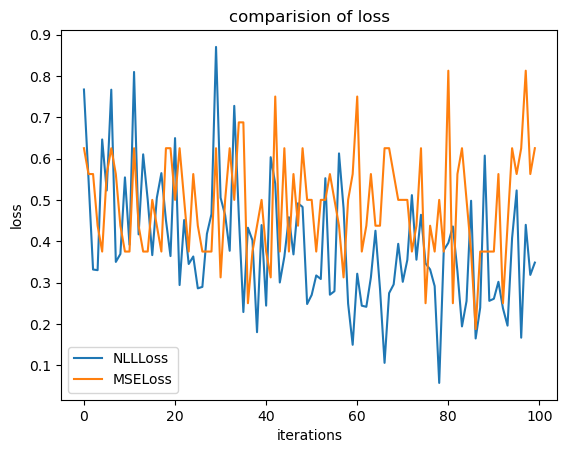

In [18]:
plt.plot(NLLLoss)
plt.plot(MSELoss)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("comparision of loss")
plt.legend(['NLLLoss', 'MSELoss'])
plt.show()

In [20]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 48),
            nn.Tanh(),
            nn.Linear(48, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 100
NLLLoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    NLLLoss[epoch-1] =  loss.detach().numpy()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.693752
Epoch: 1, Loss: 0.500396
Epoch: 2, Loss: 0.485249
Epoch: 3, Loss: 0.784251
Epoch: 4, Loss: 0.439565
Epoch: 5, Loss: 0.339693
Epoch: 6, Loss: 0.320354
Epoch: 7, Loss: 0.368357
Epoch: 8, Loss: 0.827016
Epoch: 9, Loss: 0.596162
Epoch: 10, Loss: 0.551210
Epoch: 11, Loss: 0.592395
Epoch: 12, Loss: 0.419834
Epoch: 13, Loss: 0.555172
Epoch: 14, Loss: 0.378475
Epoch: 15, Loss: 0.507823
Epoch: 16, Loss: 0.559476
Epoch: 17, Loss: 0.346154
Epoch: 18, Loss: 0.537380
Epoch: 19, Loss: 0.754954
Epoch: 20, Loss: 0.357222
Epoch: 21, Loss: 0.355357
Epoch: 22, Loss: 0.473758
Epoch: 23, Loss: 0.350211
Epoch: 24, Loss: 0.607399
Epoch: 25, Loss: 0.559240
Epoch: 26, Loss: 0.310676
Epoch: 27, Loss: 0.312808
Epoch: 28, Loss: 0.367350
Epoch: 29, Loss: 0.503207
Epoch: 30, Loss: 0.274255
Epoch: 31, Loss: 0.436842
Epoch: 32, Loss: 0.511164
Epoch: 33, Loss: 0.281205
Epoch: 34, Loss: 0.488957
Epoch: 35, Loss: 0.243339
Epoch: 36, Loss: 0.352017
Epoch: 37, Loss: 0.601662
Epoch: 38, Loss: 0.411

In [22]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 48),
            nn.Tanh(),
            nn.Linear(48, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

n_epochs = 100
MSELoss = np.zeros(n_epochs)
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss2.backward()
        optimizer.step()
    
    MSELoss[epoch-1] =  loss2.detach().numpy()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))

Epoch: 0, Loss: 0.500000
Epoch: 1, Loss: 0.437500
Epoch: 2, Loss: 0.312500
Epoch: 3, Loss: 0.625000
Epoch: 4, Loss: 0.375000
Epoch: 5, Loss: 0.125000
Epoch: 6, Loss: 0.437500
Epoch: 7, Loss: 0.625000
Epoch: 8, Loss: 0.625000
Epoch: 9, Loss: 0.437500
Epoch: 10, Loss: 0.562500
Epoch: 11, Loss: 0.312500
Epoch: 12, Loss: 0.812500
Epoch: 13, Loss: 0.437500
Epoch: 14, Loss: 0.500000
Epoch: 15, Loss: 0.375000
Epoch: 16, Loss: 0.625000
Epoch: 17, Loss: 0.562500
Epoch: 18, Loss: 0.562500
Epoch: 19, Loss: 0.500000
Epoch: 20, Loss: 0.562500
Epoch: 21, Loss: 0.375000
Epoch: 22, Loss: 0.500000
Epoch: 23, Loss: 0.687500
Epoch: 24, Loss: 0.562500
Epoch: 25, Loss: 0.500000
Epoch: 26, Loss: 0.500000
Epoch: 27, Loss: 0.375000
Epoch: 28, Loss: 0.500000
Epoch: 29, Loss: 0.312500
Epoch: 30, Loss: 0.500000
Epoch: 31, Loss: 0.375000
Epoch: 32, Loss: 0.500000
Epoch: 33, Loss: 0.500000
Epoch: 34, Loss: 0.312500
Epoch: 35, Loss: 0.250000
Epoch: 36, Loss: 0.625000
Epoch: 37, Loss: 0.500000
Epoch: 38, Loss: 0.187

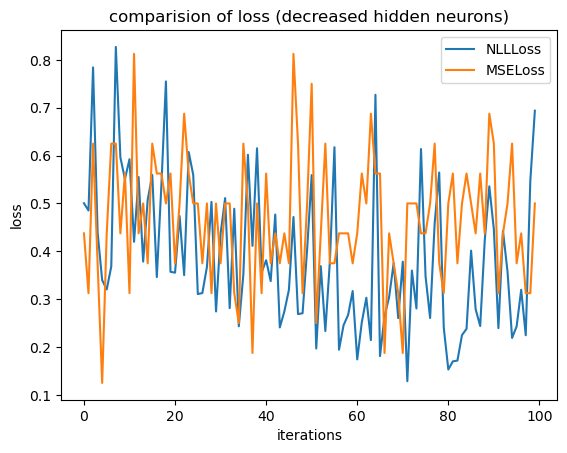

In [26]:
plt.plot(NLLLoss)
plt.plot(MSELoss)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("comparision of loss (decreased hidden neurons)")
plt.legend(['NLLLoss', 'MSELoss'])
plt.show()

Das Übertraining wurde durch die Verringerung der versteckten Neuronen nur ein wenig abgeschwächt.